## links 
- https://brian2.readthedocs.io/en/stable/user/input.html#timed-arrays
- 

In [1]:
from brian2 import *
import numpy as np 
import pandas as pd

In [2]:
gbar_kd = 5e-3*siemens*cm**-2
ek = -90*mV
vt = -40*mV

n_params = 10
n_protocols = 16
n_neurons = n_params * n_protocols 
sigma_v = 0*mV
sigma_n = 0.1 / second

# protocol 
t_on = 100 * ms
t_off = 600 * ms
v_amps = np.arange(-80., 80., 10)

In [3]:
eqs = Equations('''
                dn/dt = alphav * (1 - n) - betav * n + sigma_n*xi*second**.5 : 1
                alphav = -0.032 * (mV**-1) * (v_prot(t, i) - vt - 15*mV) / (exp(-(v_prot(t, i) - vt - 15*mV) / (5*mV)) - 1)/ms : Hz
                betav = 0.5 * exp(-(v_prot(t, i) - vt - 15*mV) / (40*mV))/ms : Hz
                ''')

In [4]:
n_intervals = 8
a = -80*mV
b = -20*mV

prot_matrix = np.ones((n_intervals, n_protocols)) * a
for iprot in range(n_protocols):     
    prot_matrix[1:-2, iprot] = v_amps[iprot] * mV

prot_matrix = np.tile(prot_matrix, n_params)
prot_matrix

array([[-80., -80., -80., ..., -80., -80., -80.],
       [-80., -70., -60., ...,  50.,  60.,  70.],
       [-80., -70., -60., ...,  50.,  60.,  70.],
       ...,
       [-80., -70., -60., ...,  50.,  60.,  70.],
       [-80., -80., -80., ..., -80., -80., -80.],
       [-80., -80., -80., ..., -80., -80., -80.]]) * mvolt

In [5]:
v_prot = TimedArray(prot_matrix, dt=100*ms)    

group = NeuronGroup(n_neurons, eqs,
                        method='milstein')

trace = StateMonitor(group, ['n'], record=True)

In [6]:
run(800*ms)

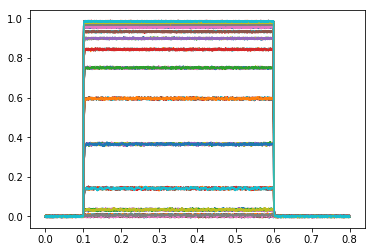

In [7]:
plt.plot(trace.t, trace.n.T);

In [8]:
trace.n.shape

(160, 8000)

## To Do 
- load protocols 
- play protocols 
- change params 
- add noise on $n$

In [9]:
prot = ['v_act','v_inact','v_deact']#,'v_ap','v_ramp']
p = 0
protocols = \
pd.read_csv('/home/janfb/qode/lfi-models/lfimodels/channelomics/protocols/k_channels/'+prot[p]+'.dat',sep='\t')

protocols = protocols.drop(protocols.columns[-1],axis=1)

# extract voltages and time
protocols1 = protocols.values

V = protocols1[:,1:].T
t = protocols1[:,0]   # attention: time step varies, but we will assume that it is constant
tstep = np.mean(np.diff(t)) # ms

time_stamp = time.strftime('%Y%m%d%H%M_')

In [10]:
Vs = {}
ts = {}

for i, p in enumerate(prot): 
    protocols = pd.read_csv('/home/janfb/qode/lfi-models/lfimodels/channelomics/protocols/k_channels/'+prot[i]+'.dat',sep='\t')
    protocols = protocols.drop(protocols.columns[-1],axis=1)

    # extract voltages and time
    protocols1 = protocols.values

    Vs[p] = protocols1[:,1:].T
    ts[p] = protocols1[:,0]   # attention: time step varies, but we will assume that it is constant

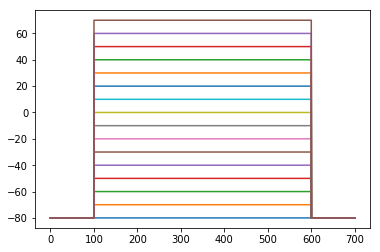

In [11]:
t = 0.324
idx = [np.where(ts['v_inact'] > t)[0][0]]

plt.plot(ts['v_act'], Vs['v_act'].T);

In [12]:
Vs['v_act'].T.shape

(27995, 16)